In [1]:
#'MetaData
#@Author : H2HBABBA2694_Aditi Anand
#Time interval for the project: 21-06-2021 - 28-06-2021
#AI-Enabled FinTech B2B Invoice Management Application
#Version
#Python 3.7.9
#Pandas == 1.0.5
#Numpy  == 1.20.2
#seaborn == 0.10.0
#sklearn == 0.22.1

# Importing all the libraries

In [2]:
import numpy as np                        
import matplotlib.pyplot as plt           
import pandas as pd                       
from sklearn.model_selection import train_test_split       
import seaborn as sns                      
from xgboost import XGBRegressor           
from xgboost import plot_importance
import datetime
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import roc_auc_score
import warnings
warnings.filterwarnings("ignore")



# Steps TODO

1.Understanding the problem

2.Data Reading

3.Removing the datapoints where the target value is null

4.Preprocess the data

5.Train , validation and test split

6.EDA

7.Feature Engg

8.Feture Selection

9.Modelling

10.HPT

11.Accuracy

In [3]:
#importing the csv file
#read_csv() # use to load or import csv file
dataset=pd.read_csv("C:\\Users\\Aditi Anand\\Desktop\H2HBABBA2694_data.csv")
dataset

,business_code,cust_number,name_customer,clear_date,buisness_year,doc_id,posting_date,document_create_date,document_create_date.1,due_in_date,invoice_currency,document type,posting_id,area_business,total_open_amount,baseline_create_date,cust_payment_terms,invoice_id,isOpen
0,U001,200803720,DEC llc,NaN,2020,1930819437,4/23/2020,20200423,20200423,20200423,USD,RV,1,NaN,9755.78,20200416,NAM1,1.930819e+09,1
1,U001,200769623,WAL-MAR,6/12/2019 0:00,2019,1929411721,6/1/2019,20190531,20190601,20190616,USD,RV,1,NaN,3689.22,20190601,NAH4,1.929412e+09,0
2,U001,200900909,SYSCO co,6/26/2019 0:00,2019,1929485411,6/12/2019,20190613,20190612,20190627,USD,RV,1,NaN,8351.59,20190612,NAA8,1.929485e+09,0
3,U001,200769623,WAL-MAR llc,6/25/2019 0:00,2019,1929491826,6/14/2019,20190614,20190614,20190629,USD,RV,1,NaN,8496.77,20190614,NAH4,1.929492e+09,0
4,U001,200769623,WAL-MAR trust,4/16/2019 0:00,2019,1929089883,4/6/2019,20190405,20190406,20190421,USD,RV,1,NaN,13175.19,20190406,NAH4,1.929090e+09,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
49995,U001,200769623,WAL-MAR us,4/1/2019 0:00,2019,1928990323,3/21/2019,20190319,20190321,20190405,USD,RV,1,NaN,76012.94,20190321,NAH4,1.928990e+09,0
49996,U001,200761734,H E BUT foundation,2/26/2019 0:00,2019,1928781023,2/12/2019,20190211,20190212,20190227,USD,RV,1,NaN,37767.72,20190212,NAA8,1.928781e+09,0
49997,U001,200726979,BJ'S corporation,2/20/2020 0:00,2020,1930475592,2/5/2020,20200204,20200205,20200220,USD,RV,1,NaN,297.30,20200205,NAA8,1.930476e+09,0
49998,U001,200726979,BJ'S,11/21/2019 0:00,2019,1930129418,11/6/2019,20191108,20191106,20191121,USD,RV,1,NaN,81.79,20191106,NAA8,1.930129e+09,0


In [4]:
#counting the row and col using shape
dataset.shape

(50000, 19)

In [5]:
#to count the number of distict values in each columns
coun_t  = dataset.nunique().to_frame(name = 'Counts')
coun_t

,Counts
business_code,6
cust_number,1094
name_customer,4227
clear_date,393
buisness_year,2
doc_id,48822
posting_date,502
document_create_date,505
document_create_date.1,503
due_in_date,546



# Removing the datapoints where the clear_date is null

In [6]:
my_dataset = dataset[dataset.clear_date.isnull()==False]
test_dataset = dataset[dataset.clear_date.isnull()]

In [7]:
my_dataset.shape , test_dataset.shape

((40000, 19), (10000, 19))

# Preprocessing


### Null Imputation

In [8]:
#checking the count of null values in each columns
my_dataset.isna().sum()

business_code                 0
cust_number                   0
name_customer                 0
clear_date                    0
buisness_year                 0
doc_id                        0
posting_date                  0
document_create_date          0
document_create_date.1        0
due_in_date                   0
invoice_currency              0
document type                 0
posting_id                    0
area_business             40000
total_open_amount             0
baseline_create_date          0
cust_payment_terms            0
invoice_id                    9
isOpen                        0
dtype: int64

In [9]:
#dropping the area business values as all the values are NULL
my_dataset=my_dataset.drop(["area_business"],axis=1)

In [10]:
my_dataset.isna().sum()

business_code             0
cust_number               0
name_customer             0
clear_date                0
buisness_year             0
doc_id                    0
posting_date              0
document_create_date      0
document_create_date.1    0
due_in_date               0
invoice_currency          0
document type             0
posting_id                0
total_open_amount         0
baseline_create_date      0
cust_payment_terms        0
invoice_id                9
isOpen                    0
dtype: int64

In [11]:
#checking the rows and columns where invoice_id is null
my_dataset[my_dataset.invoice_id.isnull()]

,business_code,cust_number,name_customer,clear_date,buisness_year,doc_id,posting_date,document_create_date,document_create_date.1,due_in_date,invoice_currency,document type,posting_id,total_open_amount,baseline_create_date,cust_payment_terms,invoice_id,isOpen
11791,CA02,140104409,LOB in,12/27/2019 0:00,2019,9500000200,4/30/2019,20190430,20190408,20190418,CAD,X2,1,454.44,20190408,CA10,NaN,0
14451,CA02,140104409,LOB co,5/31/2019 0:00,2019,9500000049,3/29/2019,20190329,20181024,20181103,CAD,X2,1,878.40,20181024,CA10,NaN,0
18817,CA02,140106054,TREE in,5/6/2019 0:00,2019,9500000129,3/29/2019,20190329,20190128,20190207,CAD,X2,1,12636.00,20190128,CA10,NaN,0
34997,CA02,140104409,LOB associates,4/17/2019 0:00,2019,9500000077,3/29/2019,20190329,20190314,20190324,CAD,X2,1,698.60,20190314,CA10,NaN,0
38018,CA02,100030194,AMAZO us,5/23/2019 0:00,2019,9500000007,3/29/2019,20190329,20190311,20190321,CAD,X2,1,846.70,20190311,CA10,NaN,0
38732,CA02,140104409,LOB associates,5/31/2019 0:00,2019,9500000051,3/29/2019,20190329,20190131,20190210,CAD,X2,1,20472.48,20190131,CA10,NaN,0
46134,CA02,140104409,LOB trust,5/31/2019 0:00,2019,9500000057,3/29/2019,20190329,20190307,20190317,CAD,X2,1,17264.88,20190307,CA10,NaN,0
47478,CA02,140104409,LOB co,12/27/2019 0:00,2019,9500000073,3/29/2019,20190329,20190228,20190310,CAD,X2,1,173.44,20190228,CA10,NaN,0
49612,CA02,140106054,TREE llc,5/6/2019 0:00,2019,9500000104,3/29/2019,20190329,20190208,20190218,CAD,X2,1,938.43,20190208,CA10,NaN,0


In [12]:
#dropping the rows where invoice_id is NULL as invoice_id has unique values so we cannot assing any random values to it so we have to drop it
my_dataset = my_dataset[my_dataset['invoice_id'].notna()]
my_dataset.shape

(39991, 18)

In [13]:
my_dataset.isna().sum()

business_code             0
cust_number               0
name_customer             0
clear_date                0
buisness_year             0
doc_id                    0
posting_date              0
document_create_date      0
document_create_date.1    0
due_in_date               0
invoice_currency          0
document type             0
posting_id                0
total_open_amount         0
baseline_create_date      0
cust_payment_terms        0
invoice_id                0
isOpen                    0
dtype: int64

### Constant / Duplicate removal

In [14]:
#checking unique values in each rows
my_dataset.nunique()

business_code                 6
cust_number                1054
name_customer              3924
clear_date                  393
buisness_year                 2
doc_id                    39131
posting_date                422
document_create_date        427
document_create_date.1      422
due_in_date                 489
invoice_currency              2
document type                 1
posting_id                    1
total_open_amount         35686
baseline_create_date        429
cust_payment_terms           71
invoice_id                39131
isOpen                        1
dtype: int64

In [15]:
#dropping posting_id as it has same values in all the rows that is it contains constant values
my_dataset=my_dataset.drop(["posting_id"],axis=1)
my_dataset=my_dataset.drop(["isOpen"],axis=1)
#my_dataset=my_dataset.drop(["document type"],axis=1)

In [16]:
my_dataset.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 39991 entries, 1 to 49998
Data columns (total 16 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   business_code           39991 non-null  object 
 1   cust_number             39991 non-null  object 
 2   name_customer           39991 non-null  object 
 3   clear_date              39991 non-null  object 
 4   buisness_year           39991 non-null  int64  
 5   doc_id                  39991 non-null  int64  
 6   posting_date            39991 non-null  object 
 7   document_create_date    39991 non-null  int64  
 8   document_create_date.1  39991 non-null  int64  
 9   due_in_date             39991 non-null  int64  
 10  invoice_currency        39991 non-null  object 
 11  document type           39991 non-null  object 
 12  total_open_amount       39991 non-null  float64
 13  baseline_create_date    39991 non-null  int64  
 14  cust_payment_terms      39991 non-null

In [17]:
#counting the number of rows where doc_id and invoice_id are same 
(my_dataset['doc_id'] == my_dataset['invoice_id']).sum()

39991

In [18]:
#doc_id and invoice id are exactly same so dropping doc_id
my_dataset=my_dataset.drop(["doc_id"],axis=1)

In [19]:
#deleting column having unique rows as this cannont help are to find any pattern in prediciton as every row id different.
my_dataset=my_dataset.drop(["invoice_id"],axis=1)

In [20]:
#deleting the insignificant columns
my_dataset=my_dataset.drop(["name_customer"],axis=1)
my_dataset=my_dataset.drop(["document_create_date"],axis=1)

In [21]:
my_dataset.shape


(39991, 12)

In [22]:
my_dataset.head()

,business_code,cust_number,clear_date,buisness_year,posting_date,document_create_date.1,due_in_date,invoice_currency,document type,total_open_amount,baseline_create_date,cust_payment_terms
1,U001,200769623,6/12/2019 0:00,2019,6/1/2019,20190601,20190616,USD,RV,3689.22,20190601,NAH4
2,U001,200900909,6/26/2019 0:00,2019,6/12/2019,20190612,20190627,USD,RV,8351.59,20190612,NAA8
3,U001,200769623,6/25/2019 0:00,2019,6/14/2019,20190614,20190629,USD,RV,8496.77,20190614,NAH4
4,U001,200769623,4/16/2019 0:00,2019,4/6/2019,20190406,20190421,USD,RV,13175.19,20190406,NAH4
5,U001,200769623,10/15/2019 0:00,2019,9/30/2019,20190930,20191015,USD,RV,454.06,20190930,NAH4


In [23]:
# printing the datatype of the columns
print(my_dataset.dtypes)

business_code              object
cust_number                object
clear_date                 object
buisness_year               int64
posting_date               object
document_create_date.1      int64
due_in_date                 int64
invoice_currency           object
document type              object
total_open_amount         float64
baseline_create_date        int64
cust_payment_terms         object
dtype: object


### Date Time Conversion

In [24]:
# changing the datatype to datetime
my_dataset['clear_date']=pd.to_datetime(my_dataset['clear_date'].astype(str))
my_dataset['due_in_date']=pd.to_datetime(my_dataset['due_in_date'].astype(str))
my_dataset['baseline_create_date']=pd.to_datetime(my_dataset['baseline_create_date'].astype(str))
my_dataset['document_create_date.1']=pd.to_datetime(my_dataset['document_create_date.1'].astype(str))
my_dataset['posting_date']=pd.to_datetime(my_dataset['posting_date'].astype(str))
my_dataset.dtypes


business_code                     object
cust_number                       object
clear_date                datetime64[ns]
buisness_year                      int64
posting_date              datetime64[ns]
document_create_date.1    datetime64[ns]
due_in_date               datetime64[ns]
invoice_currency                  object
document type                     object
total_open_amount                float64
baseline_create_date      datetime64[ns]
cust_payment_terms                object
dtype: object

In [25]:
#dropping the rows where document for invoice is created before baseline carete date
temp = pd.Series(my_dataset['document_create_date.1'] - my_dataset['baseline_create_date']).dt.days
my_dataset = my_dataset[((temp==0) | (temp>0))].reset_index(drop=True)
my_dataset.shape

(37348, 12)

In [26]:
#due_terms is the number of days between the due_in_date and the baseline_create_date
my_dataset['due_term']=pd.Series(my_dataset['due_in_date'] - my_dataset['baseline_create_date']).dt.days
my_dataset['delay']=(my_dataset['clear_date']-my_dataset['due_in_date']).dt.days

In [27]:
#changing the CAD amount to USD amount 
my_dataset.loc[my_dataset.invoice_currency == 'CAD', 'total_open_amount'] = 0.81*my_dataset['total_open_amount']

In [28]:
#dropping invoice currency column as we dont need it anymore as all amount is changed to USD currency
my_dataset = my_dataset.drop(columns=['invoice_currency'])

<AxesSubplot:xlabel='total_open_amount'>

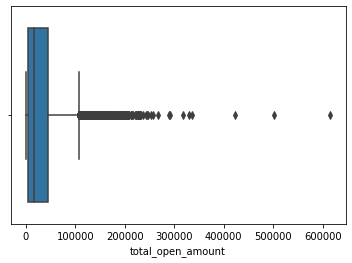

In [29]:
#checking for thr outliers in total_open_amount
sns.boxplot(x=my_dataset['total_open_amount'])

In [30]:
#calculating the outliers from total_open_amount
Q1 = my_dataset['total_open_amount'].quantile(0.25)
Q3 = my_dataset['total_open_amount'].quantile(0.75)
IQR = Q3-Q1
lower_range =( Q1 -(2 * IQR)) # with 1.5 observed almost ~1500 outliers which is almost 4.8% of data,so changed to 3 where i got 221 outliers  and treated it
upper_range = Q3 + (2* IQR)
print("Q1: ",Q1)
print("Q3: ",Q3)
print("IQR: ",IQR)
print("lower_range",lower_range)
print('upper_range',upper_range)
print("no. of outliers ---->",len(my_dataset[(my_dataset.total_open_amount < lower_range) | (my_dataset.total_open_amount > upper_range)]))#total no.of outliers

Q1:  4330.335
Q3:  45396.25
IQR:  41065.915
lower_range -77801.495
upper_range 127528.08
no. of outliers ----> 937


In [31]:
#dropping the rows with the outliers in total_open_amount
my_dataset.drop(my_dataset[ (my_dataset.total_open_amount  > upper_range) | (my_dataset.total_open_amount  < lower_range) ].index , inplace=True)

In [32]:
#renaming document type to document_type 
my_dataset.rename(columns={"document type":"document_type"}, inplace=True)

# Split Data

In [33]:
#sorting the data with posting date to split the data based on posting date
my_dataset.sort_values('posting_date')

,business_code,cust_number,clear_date,buisness_year,posting_date,document_create_date.1,due_in_date,document_type,total_open_amount,baseline_create_date,cust_payment_terms,due_term,delay
21733,U001,200769623,2019-01-09,2019,2018-12-30,2018-12-30,2019-01-14,RV,14475.85,2018-12-30,NAH4,15,-5
4584,U001,200706844,2019-01-15,2019,2018-12-30,2018-12-30,2019-01-14,RV,6902.58,2018-12-30,NAA8,15,1
12499,U001,100001196,2019-01-14,2019,2018-12-30,2018-12-30,2019-01-14,RV,23785.79,2018-12-30,NAA8,15,0
37263,U001,200769623,2019-01-09,2019,2018-12-30,2018-12-30,2019-01-14,RV,150.44,2018-12-30,NAH4,15,-5
15117,U001,200769623,2019-01-15,2019,2018-12-30,2018-12-30,2019-01-14,RV,23826.53,2018-12-30,NAH4,15,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
35899,U001,200760666,2020-03-09,2020,2020-02-26,2020-02-26,2020-05-01,RV,1025.86,2020-02-26,NAGD,65,-53
25848,U001,200759878,2020-03-13,2020,2020-02-27,2020-02-27,2020-03-13,RV,15005.29,2020-02-27,NAH4,15,0
5571,U001,200759878,2020-03-13,2020,2020-02-27,2020-02-27,2020-03-13,RV,65988.21,2020-02-27,NAH4,15,0
20398,U001,200759878,2020-03-13,2020,2020-02-27,2020-02-27,2020-03-13,RV,70504.55,2020-02-27,NAH4,15,0


In [34]:
# Converting the main_train into X and y so that we can pass it onto train_test_split function

# X --> contains the dataframe without the target i.e delay
X=my_dataset.drop(['delay'],axis=1)

# y --> contains only the target value 
Y=my_dataset['delay']

In [35]:
#splitting the data into two part -- doing a 70:30 split i.e 30% data fed to intermediate validation data set
X_train,X_val,y_train,y_val= train_test_split(X,Y,test_size=0.3,random_state=0,shuffle=True)

In [36]:
X_train.shape , X_val.shape

((25487, 12), (10924, 12))

# EDA

<AxesSubplot:xlabel='delay', ylabel='Density'>

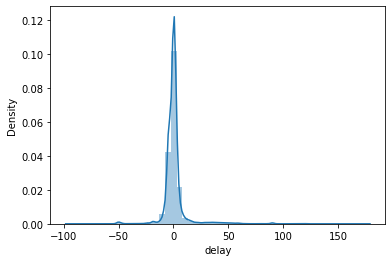

In [37]:
sns.distplot(y_train)

In [38]:
X_train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 25487 entries, 15293 to 2797
Data columns (total 12 columns):
 #   Column                  Non-Null Count  Dtype         
---  ------                  --------------  -----         
 0   business_code           25487 non-null  object        
 1   cust_number             25487 non-null  object        
 2   clear_date              25487 non-null  datetime64[ns]
 3   buisness_year           25487 non-null  int64         
 4   posting_date            25487 non-null  datetime64[ns]
 5   document_create_date.1  25487 non-null  datetime64[ns]
 6   due_in_date             25487 non-null  datetime64[ns]
 7   document_type           25487 non-null  object        
 8   total_open_amount       25487 non-null  float64       
 9   baseline_create_date    25487 non-null  datetime64[ns]
 10  cust_payment_terms      25487 non-null  object        
 11  due_term                25487 non-null  int64         
dtypes: datetime64[ns](5), float64(1), int64(2),

<AxesSubplot:xlabel='clear_date', ylabel='baseline_create_date'>

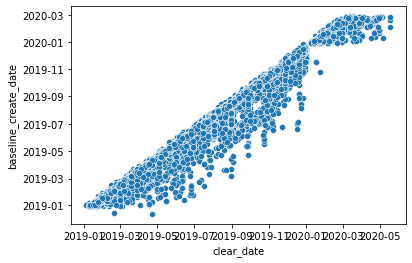

In [39]:
sns.scatterplot(data=X_train.merge(y_train,on=X_train.index) , x='clear_date' , y='baseline_create_date')

<AxesSubplot:xlabel='clear_date', ylabel='total_open_amount'>

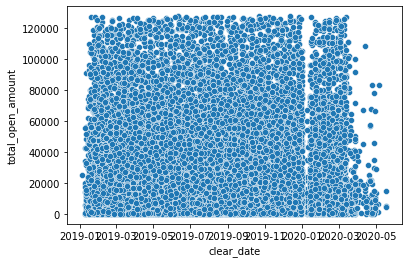

In [40]:
sns.scatterplot(data=X_train.merge(y_train,on=X_train.index) , x='clear_date' , y='total_open_amount')

<AxesSubplot:xlabel='delay', ylabel='total_open_amount'>

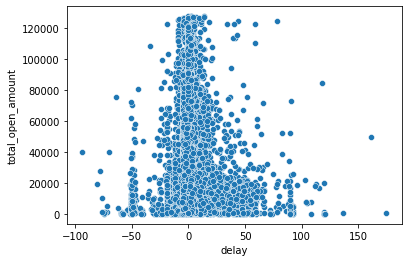

In [41]:
sns.scatterplot(data=X_train.merge(y_train,on=X_train.index) , x='delay' , y='total_open_amount')

<AxesSubplot:xlabel='delay', ylabel='due_term'>

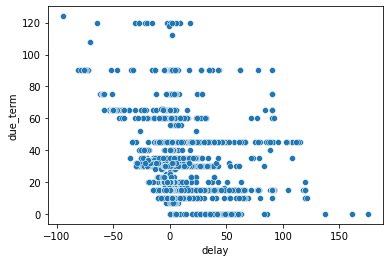

In [42]:
sns.scatterplot(data=X_train.merge(y_train,on=X_train.index) , x='delay' , y='due_term')

# Feature Engineering

### Changing the date values into seperate columns as Year, Day and month

In [43]:
#for the X_train set
X_train['baseline_create_date_day'] = X_train['baseline_create_date'].dt.day
X_train['due_in_date_day'] = X_train['due_in_date'].dt.day
X_train['document_create_date.1_day'] = X_train['document_create_date.1'].dt.day
X_train['baseline_create_date_month'] = X_train['baseline_create_date'].dt.month
X_train['due_in_date_month'] = X_train['due_in_date'].dt.month
X_train['document_create_date.1_month'] = X_train['document_create_date.1'].dt.month
X_train['baseline_create_date_year'] = X_train['baseline_create_date'].dt.year
X_train['due_in_date_year'] = X_train['due_in_date'].dt.year
X_train['document_create_date.1_year'] = X_train['document_create_date.1'].dt.year
X_train['posting_date_day'] = X_train['posting_date'].dt.day
X_train['posting_date_month'] = X_train['posting_date'].dt.month
X_train['posting_date_year'] = X_train['posting_date'].dt.year

#for the X_val set
X_val['document_create_date.1_day'] =X_val['document_create_date.1'].dt.day
X_val['baseline_create_date_day'] =X_val['baseline_create_date'].dt.day
X_val['due_in_date_day'] = X_val['due_in_date'].dt.day
X_val['document_create_date.1_month'] = X_val['document_create_date.1'].dt.month
X_val['due_in_date_month'] = X_val['due_in_date'].dt.month
X_val['baseline_create_date_month'] = X_val['baseline_create_date'].dt.month
X_val['baseline_create_date_year'] = X_val['baseline_create_date'].dt.year
X_val['due_in_date_year'] = X_val['due_in_date'].dt.year
X_val['document_create_date.1_year'] = X_val['document_create_date.1'].dt.year
X_val['posting_date_day'] = X_val['posting_date'].dt.day
X_val['posting_date_month'] = X_val['posting_date'].dt.month
X_val['posting_date_year'] = X_val['posting_date'].dt.year




In [44]:
X_train.shape

(25487, 24)

In [45]:
#dropping the date columns are we have already changed it into the day, month and year cols seperately
X_val =X_val.drop(columns = ['due_in_date'])
X_val =X_val.drop(columns = ['baseline_create_date'])
X_train =X_train.drop(columns = ['document_create_date.1'])
X_val =X_val.drop(columns = ['document_create_date.1'])
X_train =X_train.drop(columns = ['due_in_date'])
X_train =X_train.drop(columns = ['baseline_create_date'])
X_val =X_val.drop(columns = ['posting_date'])
X_train =X_train.drop(columns = ['posting_date'])
X_val =X_val.drop(columns = ['clear_date'])
X_train =X_train.drop(columns = ['clear_date'])

In [46]:
X_train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 25487 entries, 15293 to 2797
Data columns (total 19 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   business_code                 25487 non-null  object 
 1   cust_number                   25487 non-null  object 
 2   buisness_year                 25487 non-null  int64  
 3   document_type                 25487 non-null  object 
 4   total_open_amount             25487 non-null  float64
 5   cust_payment_terms            25487 non-null  object 
 6   due_term                      25487 non-null  int64  
 7   baseline_create_date_day      25487 non-null  int64  
 8   due_in_date_day               25487 non-null  int64  
 9   document_create_date.1_day    25487 non-null  int64  
 10  baseline_create_date_month    25487 non-null  int64  
 11  due_in_date_month             25487 non-null  int64  
 12  document_create_date.1_month  25487 non-null  int64  
 13

In [47]:
#counting the number of unique values in the business_code
my_dataset.business_code.value_counts()

U001    35216
CA02      545
U013      518
U002      117
U005       11
U007        4
Name: business_code, dtype: int64

In [48]:
#importing label encoder
from sklearn.preprocessing import LabelEncoder

In [49]:
#encoding the businesscode using label encoding
business_code_enc=LabelEncoder()
business_code_enc.fit(X_train['business_code'])
X_train['business_code_enc']=business_code_enc.transform(X_train['business_code'])

In [50]:
X_val['business_code_enc']=business_code_enc.transform(X_val['business_code'])

In [51]:
#dropping the business_code as we have encoded it
X_val =X_val.drop(columns = ['business_code'])
X_train =X_train.drop(columns = ['business_code'])

In [52]:
#counting the number of unique values in the cust_number
X_train.cust_number.value_counts()

200769623    6759
200726979    1145
200762301     793
200759878     758
200794332     708
             ... 
200481695       1
100054709       1
100047403       1
100046466       1
200548360       1
Name: cust_number, Length: 847, dtype: int64

In [53]:
# to extract the number from cust_number rows which are in string format eg CCCA01...
X_train['cust_number'] = X_train['cust_number'].str.extract('(\d+)')
X_val['cust_number'] = X_val['cust_number'].str.extract('(\d+)')

In [54]:
#type cast the cust_number calumn to int
X_train['cust_number'] =X_train['cust_number'].astype(int)
X_val['cust_number'] =X_val['cust_number'].astype(int)

In [55]:
#encoding the cust_payment_terms using label encoding
cust_payment_terms_enc=LabelEncoder()
cust_payment_terms_enc.fit(X_train['cust_payment_terms'])
X_train['cust_payment_terms_enc']=cust_payment_terms_enc.transform(X_train['cust_payment_terms'])


In [56]:
cust_payment_terms_enc.fit(X_val['cust_payment_terms'])
X_val['cust_payment_terms_enc']=cust_payment_terms_enc.transform(X_val['cust_payment_terms'])

In [57]:
X_val =X_val.drop(columns = ['cust_payment_terms'])
X_train =X_train.drop(columns = ['cust_payment_terms'])

In [58]:
X_val.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 10924 entries, 6417 to 4878
Data columns (total 19 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   cust_number                   10924 non-null  int32  
 1   buisness_year                 10924 non-null  int64  
 2   document_type                 10924 non-null  object 
 3   total_open_amount             10924 non-null  float64
 4   due_term                      10924 non-null  int64  
 5   document_create_date.1_day    10924 non-null  int64  
 6   baseline_create_date_day      10924 non-null  int64  
 7   due_in_date_day               10924 non-null  int64  
 8   document_create_date.1_month  10924 non-null  int64  
 9   due_in_date_month             10924 non-null  int64  
 10  baseline_create_date_month    10924 non-null  int64  
 11  baseline_create_date_year     10924 non-null  int64  
 12  due_in_date_year              10924 non-null  int64  
 13 

In [59]:
#encoding the document_type using label encoding
document_type_enc = LabelEncoder()
document_type_enc.fit(X_train["document_type"])
X_train["document_type_enc"]=document_type_enc.transform(X_train["document_type"])

In [60]:
document_type_enc.fit(X_val["document_type"])
X_val["document_type_enc"]=document_type_enc.transform(X_val["document_type"])

In [61]:
X_val =X_val.drop(columns = ['document_type'])
X_train =X_train.drop(columns = ['document_type'])

# Feature Selection

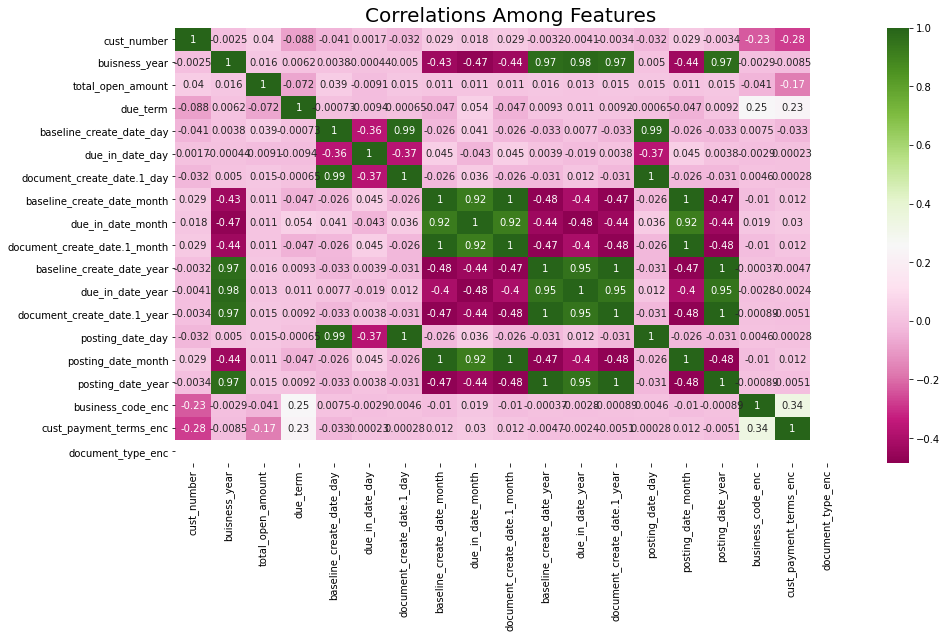

In [62]:
plt.subplots(figsize =(15,8))
sns.heatmap(X_train.corr(),annot=True,cmap="PiYG")
plt.title("Correlations Among Features",fontsize = 20);

In [63]:
def handling_correlation(df,threshold=0.8):
    # creating set to hold the correlated features
    corr_features = set()
    # create the correlation matrix (default to pearson)
    corr_matrix =df.corr()
    #code for selecting all correleated features
    for i in range(len(corr_matrix .columns)):
        for j in range(i):
            if abs(corr_matrix.iloc[i, j]) >threshold:
                colname = corr_matrix.columns[i]
                corr_features.add(colname)
    return list(corr_features)

In [64]:
#in the time of checking co-relation we have to check with target also that's why I am passing out output_label also
handling_correlation(X_train.copy(),0.85)

['posting_date_month',
 'posting_date_year',
 'baseline_create_date_year',
 'posting_date_day',
 'due_in_date_month',
 'document_create_date.1_day',
 'due_in_date_year',
 'document_create_date.1_year',
 'document_create_date.1_month']

In [65]:
#dropping col as they are highly correlated with each other
X_train =X_train.drop(columns = ['baseline_create_date_year'])
X_train =X_train.drop(columns = ['posting_date_year'])
X_val =X_val.drop(columns = ['baseline_create_date_year'])
X_val =X_val.drop(columns = ['posting_date_year'])

In [66]:
handling_correlation(X_train.copy(),0.85)

['posting_date_month',
 'posting_date_day',
 'due_in_date_month',
 'document_create_date.1_day',
 'due_in_date_year',
 'document_create_date.1_year',
 'document_create_date.1_month']

In [67]:
X_train =X_train.drop(columns = ['posting_date_month'])
X_train =X_train.drop(columns = ['posting_date_day'])
X_val =X_val.drop(columns = ['posting_date_month'])
X_val =X_val.drop(columns = ['posting_date_day'])

In [68]:
handling_correlation(X_train.copy(),0.85)

['due_in_date_month',
 'document_create_date.1_day',
 'due_in_date_year',
 'document_create_date.1_year',
 'document_create_date.1_month']

# Modelling

In [69]:
# Defining Lists to Store in the Results and Names of Algorithms
MSE_Score = []
R2_Score = []
Algorithm = []

### Linear Regression

In [70]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score
base_model= LinearRegression()
base_model.fit(X_train,y_train)
Algorithm.append('Linear Regression')


In [71]:
y_predict_LR=base_model.predict(X_val)

In [72]:
y_val

6417     -3
24585   -20
25301     3
12346     0
30577     3
         ..
33723   -17
11261     0
5053      1
18241    -5
4878      4
Name: delay, Length: 10924, dtype: int64

In [73]:
MSE_Score.append(mean_squared_error(y_val, y_predict_LR, squared=False))

In [74]:
R2_Score.append(r2_score(y_val,y_predict_LR))

### Decision Tree Regressor

In [75]:
from sklearn.tree import DecisionTreeRegressor
regressor = DecisionTreeRegressor(random_state=0 , max_depth=5)
Algorithm.append('DecisionTreeRegressor')

In [76]:
regressor.fit(X_train, y_train)

DecisionTreeRegressor(max_depth=5, random_state=0)

In [77]:
y_predict_DTR = regressor.predict(X_val)

In [78]:
MSE_Score.append(mean_squared_error(y_val, y_predict_DTR, squared=False))

In [79]:
R2_Score.append(r2_score(y_val,y_predict_DTR))

### Support Vector Regression

In [80]:
# Fitting SVR to the Training Set
from sklearn.svm import SVR
Algorithm.append('Support Vector Regression')
clf = SVR()
clf.fit(X_train, y_train)

# Predicting the Test Set Results
y_predicted_SVR = clf.predict(X_val) 

In [81]:
# Appending the Scores For Visualisation at a Later Part
MSE_Score.append(mean_squared_error(y_val, y_predicted_SVR))
R2_Score.append(r2_score(y_val, y_predicted_SVR))

### Random Forest Regressor

In [82]:
# Fitting Random Forest Regressor Tree to the Training Set
from sklearn.ensemble import RandomForestRegressor
Algorithm.append('Random Forest Regressor')
random = RandomForestRegressor()
random.fit(X_train, y_train)

# Predicting the Test Set Results
y_predicted_RFR = random.predict(X_val)

In [83]:
# Appending the Scores For Visualisation at a Later Part
MSE_Score.append(mean_squared_error(y_val, y_predicted_RFR))
R2_Score.append(r2_score(y_val, y_predicted_RFR))

# Score Card of the Models' Performances

In [84]:
# Just Combining the Lists into a DataFrame for a Better Visualisation
Comparison = pd.DataFrame(list(zip(Algorithm, MSE_Score, R2_Score)), columns = ['Algorithm', 'MSE_Score', 'R2_Score'])

In [85]:
# Score Card
Comparison

,Algorithm,MSE_Score,R2_Score
0,Linear Regression,10.185635,0.157155
1,DecisionTreeRegressor,10.047445,0.179870
2,Support Vector Regression,102.750561,0.165251
3,Random Forest Regressor,107.927658,0.123192



# Lost Data

In [86]:
test_dataset.nunique()

business_code                6
cust_number                551
name_customer             1768
clear_date                   0
buisness_year                1
doc_id                    9682
posting_date                81
document_create_date        87
document_create_date.1      81
due_in_date                125
invoice_currency             2
document type                1
posting_id                   1
area_business                0
total_open_amount         8998
baseline_create_date        83
cust_payment_terms          46
invoice_id                9682
isOpen                       1
dtype: int64

In [87]:
test_dataset=test_dataset.drop(["posting_id"],axis=1)
test_dataset=test_dataset.drop(["isOpen"],axis=1)
test_dataset=test_dataset.drop(["clear_date"],axis=1)
test_dataset=test_dataset.drop(["area_business"],axis=1)

In [88]:
test_dataset.isna().sum()

business_code             0
cust_number               0
name_customer             0
buisness_year             0
doc_id                    0
posting_date              0
document_create_date      0
document_create_date.1    0
due_in_date               0
invoice_currency          0
document type             0
total_open_amount         0
baseline_create_date      0
cust_payment_terms        0
invoice_id                0
dtype: int64

In [89]:
test_dataset.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 10000 entries, 0 to 49999
Data columns (total 15 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   business_code           10000 non-null  object 
 1   cust_number             10000 non-null  object 
 2   name_customer           10000 non-null  object 
 3   buisness_year           10000 non-null  int64  
 4   doc_id                  10000 non-null  int64  
 5   posting_date            10000 non-null  object 
 6   document_create_date    10000 non-null  int64  
 7   document_create_date.1  10000 non-null  int64  
 8   due_in_date             10000 non-null  int64  
 9   invoice_currency        10000 non-null  object 
 10  document type           10000 non-null  object 
 11  total_open_amount       10000 non-null  float64
 12  baseline_create_date    10000 non-null  int64  
 13  cust_payment_terms      10000 non-null  object 
 14  invoice_id              10000 non-null

In [90]:
#checking if doc_id and invoice_id are same 
(test_dataset['doc_id'] == test_dataset['invoice_id']).sum()

10000

In [91]:
#doc_id and invoice id are exactly same so dropping doc_id
test_dataset=test_dataset.drop(["doc_id"],axis=1)

In [92]:
#deleting column having unique rows as this cannont help are to find any pattern in prediciton as every row id different.
test_dataset=test_dataset.drop(["invoice_id"],axis=1)

In [93]:
#deleting the insignificant columns
test_dataset=test_dataset.drop(["name_customer"],axis=1)
test_dataset=test_dataset.drop(["document_create_date"],axis=1)

In [94]:
test_dataset.shape

(10000, 11)

In [95]:
test_dataset.head()

,business_code,cust_number,buisness_year,posting_date,document_create_date.1,due_in_date,invoice_currency,document type,total_open_amount,baseline_create_date,cust_payment_terms
0,U001,200803720,2020,4/23/2020,20200423,20200423,USD,RV,9755.78,20200416,NAM1
7,U001,200769623,2020,3/4/2020,20200304,20200319,USD,RV,13505.14,20200304,NAH4
10,U001,200769623,2020,2/29/2020,20200229,20200315,USD,RV,5496.44,20200229,NAH4
15,U001,200769623,2020,4/12/2020,20200412,20200427,USD,RV,71674.10,20200412,NAH4
16,U001,200780383,2020,4/14/2020,20200414,20200429,USD,RV,20276.74,20200414,NAA8


In [96]:
# printint the datatype of the columns
print(test_dataset.dtypes)

business_code              object
cust_number                object
buisness_year               int64
posting_date               object
document_create_date.1      int64
due_in_date                 int64
invoice_currency           object
document type              object
total_open_amount         float64
baseline_create_date        int64
cust_payment_terms         object
dtype: object


In [97]:
#datetime convert
test_dataset['due_in_date']=pd.to_datetime(test_dataset['due_in_date'].astype(str))
test_dataset['baseline_create_date']=pd.to_datetime(test_dataset['baseline_create_date'].astype(str))
test_dataset['document_create_date.1']=pd.to_datetime(test_dataset['document_create_date.1'].astype(str))
test_dataset['posting_date']=pd.to_datetime(test_dataset['posting_date'].astype(str))
test_dataset.dtypes

business_code                     object
cust_number                       object
buisness_year                      int64
posting_date              datetime64[ns]
document_create_date.1    datetime64[ns]
due_in_date               datetime64[ns]
invoice_currency                  object
document type                     object
total_open_amount                float64
baseline_create_date      datetime64[ns]
cust_payment_terms                object
dtype: object

In [98]:
#dropping the rows where document for invoice is created before baseline carete date
temp = pd.Series(test_dataset['document_create_date.1'] - test_dataset['baseline_create_date']).dt.days
test_dataset = test_dataset[((temp==0) | (temp>0))].reset_index(drop=True)
test_dataset.shape

(9429, 11)

In [99]:
test_dataset['due_term']=pd.Series(test_dataset['due_in_date'] - test_dataset['baseline_create_date']).dt.days

In [100]:
#changing the CAD amount to USD amount 
test_dataset.loc[test_dataset.invoice_currency == 'CAD', 'total_open_amount'] = 0.81*test_dataset['total_open_amount']

In [101]:
#dropping invoice currency column as we dont need it anymore
test_dataset = test_dataset.drop(columns=['invoice_currency'])

In [102]:
#renaming document type to document_type 
test_dataset.rename(columns={"document type":"document_type"}, inplace=True)

In [103]:
test_dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9429 entries, 0 to 9428
Data columns (total 11 columns):
 #   Column                  Non-Null Count  Dtype         
---  ------                  --------------  -----         
 0   business_code           9429 non-null   object        
 1   cust_number             9429 non-null   object        
 2   buisness_year           9429 non-null   int64         
 3   posting_date            9429 non-null   datetime64[ns]
 4   document_create_date.1  9429 non-null   datetime64[ns]
 5   due_in_date             9429 non-null   datetime64[ns]
 6   document_type           9429 non-null   object        
 7   total_open_amount       9429 non-null   float64       
 8   baseline_create_date    9429 non-null   datetime64[ns]
 9   cust_payment_terms      9429 non-null   object        
 10  due_term                9429 non-null   int64         
dtypes: datetime64[ns](4), float64(1), int64(2), object(4)
memory usage: 810.4+ KB


In [104]:
test_dataset['baseline_create_date_day'] = test_dataset['baseline_create_date'].dt.day
test_dataset['due_in_date_day'] =test_dataset['due_in_date'].dt.day
test_dataset['baseline_create_date_month'] = test_dataset['baseline_create_date'].dt.month
test_dataset['due_in_date_month'] = test_dataset['due_in_date'].dt.month
test_dataset['baseline_create_date_year'] = test_dataset['baseline_create_date'].dt.year
test_dataset['due_in_date_year'] = test_dataset['due_in_date'].dt.year
test_dataset['posting_date_day'] =test_dataset['posting_date'].dt.day
test_dataset['posting_date_month'] = test_dataset['posting_date'].dt.month
test_dataset['posting_date_year'] = test_dataset['posting_date'].dt.year
test_dataset['document_create_date.1_day'] =test_dataset['document_create_date.1'].dt.day
test_dataset['document_create_date.1_month'] = test_dataset['document_create_date.1'].dt.month
test_dataset['document_create_date.1_year'] = test_dataset['document_create_date.1'].dt.year

In [105]:
test_dataset =test_dataset.drop(columns = ['baseline_create_date'])
test_dataset =test_dataset.drop(columns = ['due_in_date'])
test_dataset =test_dataset.drop(columns = ['posting_date'])
test_dataset =test_dataset.drop(columns = ['document_create_date.1'])

In [106]:
test_dataset.shape

(9429, 19)

In [107]:
test_dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9429 entries, 0 to 9428
Data columns (total 19 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   business_code                 9429 non-null   object 
 1   cust_number                   9429 non-null   object 
 2   buisness_year                 9429 non-null   int64  
 3   document_type                 9429 non-null   object 
 4   total_open_amount             9429 non-null   float64
 5   cust_payment_terms            9429 non-null   object 
 6   due_term                      9429 non-null   int64  
 7   baseline_create_date_day      9429 non-null   int64  
 8   due_in_date_day               9429 non-null   int64  
 9   baseline_create_date_month    9429 non-null   int64  
 10  due_in_date_month             9429 non-null   int64  
 11  baseline_create_date_year     9429 non-null   int64  
 12  due_in_date_year              9429 non-null   int64  
 13  pos

In [108]:
business_code_enc=LabelEncoder()
business_code_enc.fit(test_dataset['business_code'])
test_dataset['business_code_enc']=business_code_enc.transform(test_dataset['business_code'])
test_dataset =test_dataset.drop(columns = ['business_code'])

In [109]:
test_dataset.cust_number.value_counts()

200769623    2773
200726979     399
200762301     384
200744019     332
200759878     329
             ... 
100028450       1
200728652       1
200397176       1
100059042       1
200275253       1
Name: cust_number, Length: 500, dtype: int64

In [110]:
# to extract the number from cust_number rows which are in string format eg CCCA01...
test_dataset['cust_number'] = test_dataset['cust_number'].str.extract('(\d+)')

#type cast the cust_number calumn to int
test_dataset['cust_number'] =test_dataset['cust_number'].astype(int)

In [111]:
cust_payment_terms_enc=LabelEncoder()
cust_payment_terms_enc.fit(test_dataset['cust_payment_terms'])
test_dataset['cust_payment_terms_enc']=cust_payment_terms_enc.transform(test_dataset['cust_payment_terms'])
test_dataset =test_dataset.drop(columns = ['cust_payment_terms'])

In [112]:
document_type_enc = LabelEncoder()
document_type_enc.fit(test_dataset["document_type"])
test_dataset["document_type_enc"]=document_type_enc.transform(test_dataset["document_type"])

In [113]:
test_dataset =test_dataset.drop(columns = ['document_type'])

In [114]:
test_dataset =test_dataset.drop(columns = ['baseline_create_date_year'])
test_dataset =test_dataset.drop(columns = ['posting_date_day'])
test_dataset =test_dataset.drop(columns = ['posting_date_month'])
test_dataset =test_dataset.drop(columns = ['posting_date_year'])

In [115]:
test_dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9429 entries, 0 to 9428
Data columns (total 15 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   cust_number                   9429 non-null   int32  
 1   buisness_year                 9429 non-null   int64  
 2   total_open_amount             9429 non-null   float64
 3   due_term                      9429 non-null   int64  
 4   baseline_create_date_day      9429 non-null   int64  
 5   due_in_date_day               9429 non-null   int64  
 6   baseline_create_date_month    9429 non-null   int64  
 7   due_in_date_month             9429 non-null   int64  
 8   due_in_date_year              9429 non-null   int64  
 9   document_create_date.1_day    9429 non-null   int64  
 10  document_create_date.1_month  9429 non-null   int64  
 11  document_create_date.1_year   9429 non-null   int64  
 12  business_code_enc             9429 non-null   int32  
 13  cus

In [116]:
X_train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 25487 entries, 15293 to 2797
Data columns (total 15 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   cust_number                   25487 non-null  int32  
 1   buisness_year                 25487 non-null  int64  
 2   total_open_amount             25487 non-null  float64
 3   due_term                      25487 non-null  int64  
 4   baseline_create_date_day      25487 non-null  int64  
 5   due_in_date_day               25487 non-null  int64  
 6   document_create_date.1_day    25487 non-null  int64  
 7   baseline_create_date_month    25487 non-null  int64  
 8   due_in_date_month             25487 non-null  int64  
 9   document_create_date.1_month  25487 non-null  int64  
 10  due_in_date_year              25487 non-null  int64  
 11  document_create_date.1_year   25487 non-null  int64  
 12  business_code_enc             25487 non-null  int32  
 13

### Both the dataframes are having same number of columns

# Final Prediction

In [117]:
random_model=RandomForestRegressor()
random_model.fit(X_train, y_train)

prediction = random_model.predict(test_dataset)    # starting to predict

#Checking the accuracy
random_model_accuracy = round(random_model.score(X_train, y_train)*100,2)
print(round(random_model_accuracy,2),'%')

92.38 %


In [118]:
final_result = regressor.predict(test_dataset)

In [119]:
final_result = pd.Series(final_result,name='Predicted_delay')

In [120]:
#merging the target column and the training dataset column.
Final = test_dataset.merge(final_result , on = test_dataset.index )
Final

,key_0,cust_number,buisness_year,total_open_amount,due_term,baseline_create_date_day,due_in_date_day,baseline_create_date_month,due_in_date_month,due_in_date_year,document_create_date.1_day,document_create_date.1_month,document_create_date.1_year,business_code_enc,cust_payment_terms_enc,document_type_enc,Predicted_delay
0,0,200803720,2020,9755.78,7,16,23,4,4,2020,23,4,2020,1,29,0,1.043450
1,1,200769623,2020,13505.14,15,4,19,3,3,2020,4,3,2020,1,28,0,1.043450
2,2,200769623,2020,5496.44,15,29,15,2,3,2020,29,2,2020,1,28,0,1.043450
3,3,200769623,2020,71674.10,15,12,27,4,4,2020,12,4,2020,1,28,0,1.043450
4,4,200780383,2020,20276.74,15,14,29,4,4,2020,14,4,2020,1,15,0,1.043450
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9424,9424,200418007,2020,20.40,15,1,16,5,5,2020,1,5,2020,1,15,0,1.043450
9425,9425,200777735,2020,104647.12,15,19,3,3,4,2020,19,3,2020,1,15,0,1.043450
9426,9426,200418007,2020,2084.16,15,30,15,4,5,2020,30,4,2020,1,15,0,1.043450
9427,9427,200936373,2020,15.22,15,3,18,3,3,2020,3,3,2020,1,43,0,-1.574138


In [121]:
#changing the datatype of the Predicted_delay as it is giving float values
Final["Predicted_delay"]=Final["Predicted_delay"].astype(int)
Final

,key_0,cust_number,buisness_year,total_open_amount,due_term,baseline_create_date_day,due_in_date_day,baseline_create_date_month,due_in_date_month,due_in_date_year,document_create_date.1_day,document_create_date.1_month,document_create_date.1_year,business_code_enc,cust_payment_terms_enc,document_type_enc,Predicted_delay
0,0,200803720,2020,9755.78,7,16,23,4,4,2020,23,4,2020,1,29,0,1
1,1,200769623,2020,13505.14,15,4,19,3,3,2020,4,3,2020,1,28,0,1
2,2,200769623,2020,5496.44,15,29,15,2,3,2020,29,2,2020,1,28,0,1
3,3,200769623,2020,71674.10,15,12,27,4,4,2020,12,4,2020,1,28,0,1
4,4,200780383,2020,20276.74,15,14,29,4,4,2020,14,4,2020,1,15,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9424,9424,200418007,2020,20.40,15,1,16,5,5,2020,1,5,2020,1,15,0,1
9425,9425,200777735,2020,104647.12,15,19,3,3,4,2020,19,3,2020,1,15,0,1
9426,9426,200418007,2020,2084.16,15,30,15,4,5,2020,30,4,2020,1,15,0,1
9427,9427,200936373,2020,15.22,15,3,18,3,3,2020,3,3,2020,1,43,0,-1


In [122]:
#making the due_in_date for adding the predicted delay for the final output.
Final['dateInt']=Final['due_in_date_year'].astype(str) + Final['due_in_date_month'].astype(str).str.zfill(2)+ Final['due_in_date_day'].astype(str).str.zfill(2)
Final['due_in_date'] = pd.to_datetime(Final['dateInt'], format='%Y%m%d')
Final =Final.drop(columns = ['dateInt'])

In [123]:
Final

,key_0,cust_number,buisness_year,total_open_amount,due_term,baseline_create_date_day,due_in_date_day,baseline_create_date_month,due_in_date_month,due_in_date_year,document_create_date.1_day,document_create_date.1_month,document_create_date.1_year,business_code_enc,cust_payment_terms_enc,document_type_enc,Predicted_delay,due_in_date
0,0,200803720,2020,9755.78,7,16,23,4,4,2020,23,4,2020,1,29,0,1,2020-04-23
1,1,200769623,2020,13505.14,15,4,19,3,3,2020,4,3,2020,1,28,0,1,2020-03-19
2,2,200769623,2020,5496.44,15,29,15,2,3,2020,29,2,2020,1,28,0,1,2020-03-15
3,3,200769623,2020,71674.10,15,12,27,4,4,2020,12,4,2020,1,28,0,1,2020-04-27
4,4,200780383,2020,20276.74,15,14,29,4,4,2020,14,4,2020,1,15,0,1,2020-04-29
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9424,9424,200418007,2020,20.40,15,1,16,5,5,2020,1,5,2020,1,15,0,1,2020-05-16
9425,9425,200777735,2020,104647.12,15,19,3,3,4,2020,19,3,2020,1,15,0,1,2020-04-03
9426,9426,200418007,2020,2084.16,15,30,15,4,5,2020,30,4,2020,1,15,0,1,2020-05-15
9427,9427,200936373,2020,15.22,15,3,18,3,3,2020,3,3,2020,1,43,0,-1,2020-03-18


In [124]:
#creating the col predicted payment date by adding the due_in_date + predicted_delay
Final["predicted_payment_date"]=Final["due_in_date"]+pd.to_timedelta(Final["Predicted_delay"],unit='d')

# Bucketlist

In [125]:
def bucketization(x):

    if x<0:

        return('(< 0) Days')

    if x in range(0,16):

        return('(0-15) Days')

    elif x in range(16,31):

        return('(16-30) Days')

    elif x in range(31,45):

        return('(31-45) Days')

    elif x in range(45,60):

        return('(45-60) Days')

    else:

        return('(> 60) Days')



In [126]:
data = Final.reset_index(drop=True)

data['BUCKET_DAYS']= pd.Series([bucketization(x=Final['Predicted_delay'][i])  for i in range(len(data))])

bucket_mapper = {'(< 0) Days':0,'(0-15) Days':1,'(16-30) Days':2,'(31-45) Days':4,'(45-60) Days':5,'(> 60) Days':6}

data['bucket_id'] = data['BUCKET_DAYS'].map(bucket_mapper)

data.columns

Index(['key_0', 'cust_number', 'buisness_year', 'total_open_amount',
       'due_term', 'baseline_create_date_day', 'due_in_date_day',
       'baseline_create_date_month', 'due_in_date_month', 'due_in_date_year',
       'document_create_date.1_day', 'document_create_date.1_month',
       'document_create_date.1_year', 'business_code_enc',
       'cust_payment_terms_enc', 'document_type_enc', 'Predicted_delay',
       'due_in_date', 'predicted_payment_date', 'BUCKET_DAYS', 'bucket_id'],
      dtype='object')

In [127]:
data

,key_0,cust_number,buisness_year,total_open_amount,due_term,baseline_create_date_day,due_in_date_day,baseline_create_date_month,due_in_date_month,due_in_date_year,...,document_create_date.1_month,document_create_date.1_year,business_code_enc,cust_payment_terms_enc,document_type_enc,Predicted_delay,due_in_date,predicted_payment_date,BUCKET_DAYS,bucket_id
0,0,200803720,2020,9755.78,7,16,23,4,4,2020,...,4,2020,1,29,0,1,2020-04-23,2020-04-24,(0-15) Days,1
1,1,200769623,2020,13505.14,15,4,19,3,3,2020,...,3,2020,1,28,0,1,2020-03-19,2020-03-20,(0-15) Days,1
2,2,200769623,2020,5496.44,15,29,15,2,3,2020,...,2,2020,1,28,0,1,2020-03-15,2020-03-16,(0-15) Days,1
3,3,200769623,2020,71674.10,15,12,27,4,4,2020,...,4,2020,1,28,0,1,2020-04-27,2020-04-28,(0-15) Days,1
4,4,200780383,2020,20276.74,15,14,29,4,4,2020,...,4,2020,1,15,0,1,2020-04-29,2020-04-30,(0-15) Days,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9424,9424,200418007,2020,20.40,15,1,16,5,5,2020,...,5,2020,1,15,0,1,2020-05-16,2020-05-17,(0-15) Days,1
9425,9425,200777735,2020,104647.12,15,19,3,3,4,2020,...,3,2020,1,15,0,1,2020-04-03,2020-04-04,(0-15) Days,1
9426,9426,200418007,2020,2084.16,15,30,15,4,5,2020,...,4,2020,1,15,0,1,2020-05-15,2020-05-16,(0-15) Days,1
9427,9427,200936373,2020,15.22,15,3,18,3,3,2020,...,3,2020,1,43,0,-1,2020-03-18,2020-03-17,(< 0) Days,0


In [128]:
data.bucket_id.value_counts()

1    9048
0     380
4       1
Name: bucket_id, dtype: int64